### Lennard-Jones oscillator
Here, we will primarily be following "Simulating Hamiltonian Mechanics" by Leimkuhler and Reich.

The equations of motion of the Lennard-Jones oscillator are
$$\dot{q} = v$$
$$\dot{v} = -\varphi ' (q)$$
Here, $\varphi(q) = q^{-12} - 2 q^{-6}$.

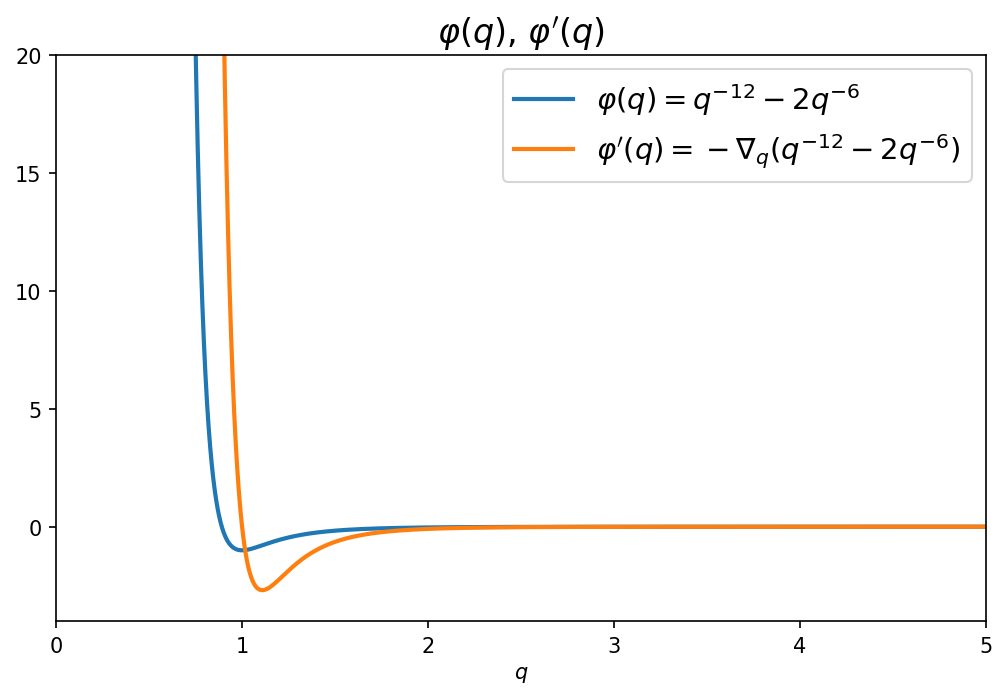

In [30]:
%matplotlib inline
# %matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math
from autograd import elementwise_grad

def plot_potential():

    q = np.linspace(0.85, 5, 10000)
    phi = q**(-12.0) - 2*q**(-6.0)

    fig, ax = plt.subplots(figsize = (8,5), dpi=150)
    ax.set_title(r"$\varphi (q)$", fontsize = 16)
    ax.plot(q, phi, linewidth = 2, label = r"$\varphi (q) = q^{-12} - 2 q^{-6}$")
    ax.set(xlim = (0, 5), xlabel = r"$q$", ylabel = r"$\varphi (q) $")
    ax.legend(fontsize = 14)
    plt.show()


def plot_force():

    q = np.linspace(0.85, 5, 10000)
    phi = lambda q:  q**(-12.0) - 2*q**(-6.0)
    
    force = elementwise_grad(phi)
    F = -force(q)


    fig, ax = plt.subplots(figsize = (8,5), dpi=150)
    ax.set_title(r"$\varphi ' (q)$", fontsize = 16)
    ax.plot(q, F, linewidth = 2, label = r"$\varphi' (q) = - \nabla_q (q^{-12} - 2 q^{-6})$")
    ax.set(xlim = (0, 5), xlabel = r"$q$", ylabel = r"$\varphi ' (q) $")
    ax.legend(fontsize = 14)
    plt.show()

def plot_potential_and_force():
    q = np.linspace(0.1, 5, 10000)
    phi = lambda q: q**(-12.0) - 2*q**(-6.0)
    force = elementwise_grad(phi)
    F = -force(q)

    fig, ax = plt.subplots(figsize = (8,5), dpi=150)
    ax.set_title(r"$\varphi (q) $, $\varphi ' (q)$", fontsize = 16)
    ax.plot(q, phi(q), linewidth = 2, label = r"$\varphi (q) = q^{-12} - 2 q^{-6}$")    
    ax.plot(q, F, linewidth = 2, label = r"$\varphi' (q) = - \nabla_q (q^{-12} - 2 q^{-6})$")
    ax.set(xlim = (0, 5), ylim = (-4, 20), xlabel = r"$q$")
    ax.legend(fontsize = 14)
    plt.show()

plot_potential_and_force()

Cool. We are now going to test out numerical methods to integrate equations of motion. We begin with one-step methods.

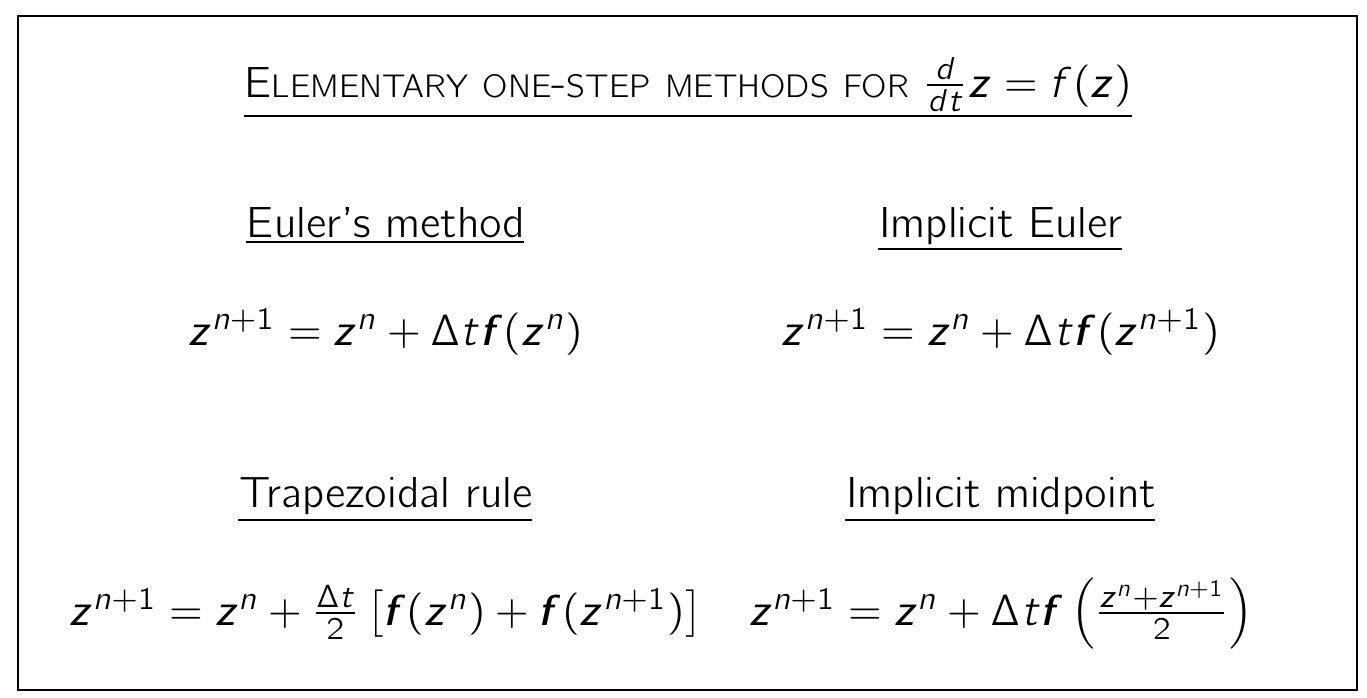

To generalize this to second-order (or $n$-order) differential equations,

$$\dot{\vec{q}} = \vec{v}$$
$$\dot{\vec{v}} = \vec{g}(\vec{q})$$

Define

$$
z = \begin{bmatrix}
\vec{q} \\  % First row
\vec{v}     % Second row
\end{bmatrix}

\quad \quad

f(z) = f\bigg( 
    \begin{bmatrix}
    \vec{q} \\  % First row
    \vec{v}     % Second row
    \end{bmatrix}

\bigg)
=
    \begin{bmatrix}
    \vec{v} \\  % First row
    \vec{g}(\vec{q})     % Second row
    \end{bmatrix}

=\dot{z}
$$